In [1]:
"""---------------------------------------
Author: Rajkumar Conjeevaram Mohan
Email: rajkumarcm@yahoo.com
Program: Quadratic Discriminant Analysis
---------------------------------------"""

'---------------------------------------\nAuthor: Rajkumar Conjeevaram Mohan\nEmail: rajkumarcm@yahoo.com\nProgram: Quadratic Discriminant Analysis\n---------------------------------------'

In [16]:
import numpy as np
from scipy.stats import multivariate_normal as m_normal
%matplotlib inline
from matplotlib import pyplot as plt
np.random.seed(1234)

In [17]:
# Random statistical parameters for sampling

mu = [[2.5, 2.5], [-1.5, -1.5]]
cov = [np.eye(2), np.eye(2)*1.2]
prior_c = [0.5, 0.5]
n_samples = 40

In [18]:
# Draw samples from multivariate normal distribution

x = []
y = []
for i in range(len(mu)):
    x.append(np.random.multivariate_normal(mean=mu[i], cov=cov[i], size=n_samples))
    y.append([i]*n_samples)

samples = np.vstack(x)
labels = np.hstack(y)

In [19]:
# Estimate the paramters of the data
est_mean = []
est_cov = []
for c in range(len(mu)):
    tmp_mu = np.mean(x[c], axis=0)
    est_mean.append(tmp_mu)
    tmp_cov = 1/n_samples * (x[c] - tmp_mu).T @ (x[c] - tmp_mu)
    est_cov.append(tmp_cov)

In [20]:
# Create meshgrid for coloring surface by label

x1_min, x2_min = np.min(samples, axis=0)
x1_max, x2_max = np.max(samples, axis=0)
x1 = np.linspace(x1_min-1, x1_max+1, 100)
x2 = np.linspace(x2_min-1, x2_max+1, 100)
x1, x2 = np.meshgrid(x1, x2)
xy = np.c_[x1.ravel(), x2.ravel()]
N_pts, _ = xy.shape

In [21]:
# Compute the pdf for the meshgrid features

surf_p_y = np.zeros([N_pts, 2])
for i in range(N_pts):
    for c in range(len(mu)):
        surf_p_y[i, c] = m_normal.pdf(x=xy[i], mean=est_mean[c], cov=est_cov[c]) * \
                         prior_c[c]
    surf_p_y[i] /= np.sum(surf_p_y[i])
surf_pred = np.argmax(surf_p_y, axis=1)

C:\Users\Rajkumar\AppData\Local\Temp\ipykernel_6316\1092840587.py:10: UserWarning: No contour levels were found within the data range.
  axes.contour(x1, x2, surf_p_y[:, c].reshape([100, 100]), levels=0, colors='white')


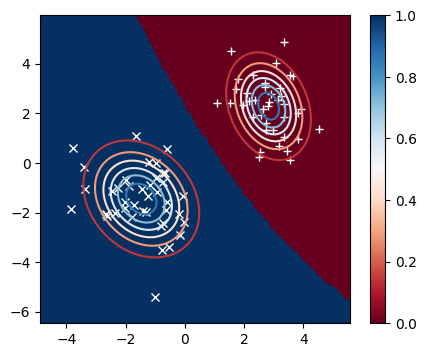

In [22]:
surf_pred = np.reshape(surf_pred, [100, 100])
pred = np.zeros([N_pts, 2])
for i in range(N_pts):
    for c in range(len(mu)):
        pred[i, c] = m_normal.pdf(x=xy[i], mean=est_mean[c], cov=est_cov[c])
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
plt.pcolormesh(x1, x2, surf_pred)
plt.set_cmap('RdBu')
for c, m in zip(range(len(mu)), '+x'):
    axes.contour(x1, x2, surf_p_y[:, c].reshape([100, 100]), levels=0, colors='white')
    axes.plot(x[c][:, 0], x[c][:, 1], m+'w')
    axes.contour(x1, x2, pred[:, c].reshape([100, 100]), cmap='RdBu')
plt.colorbar()